# Scraping movie posters

## Prototype based on wikipedia

In [1]:
import requests
from bs4 import BeautifulSoup

In [6]:
def get_movie_poster(movie_title):
    # Format the movie title for Wikipedia URL (replace spaces with underscores)
    movie_title = movie_title.replace(" ", "_")
    
    # Wikipedia URL for the movie
    url = f"https://en.wikipedia.org/wiki/{movie_title}"
    
    # Send an HTTP request to fetch the page
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        
        # Find the infobox (box with movie info) where the poster is located
        infobox = soup.find('table', {'class': 'infobox'})
        
        if infobox:
            # Find the image tag inside the infobox
            img_tag = infobox.find('img')
            
            if img_tag:
                # Extract the 'src' attribute of the image tag
                img_url = "https:" + img_tag['src']
                return img_url
            else:
                return "Poster not found."
        else:
            return "Infobox not found."
    else:
        return "Page not found."

In [5]:
# Example usage (Inception)
poster_url = get_movie_poster("Inception")
print(poster_url)

https://upload.wikimedia.org/wikipedia/en/2/2e/Inception_%282010%29_theatrical_poster.jpg


In [8]:
# Example usage (The Matrix)
poster_url = get_movie_poster("The Matrix")
print(poster_url)

https://upload.wikimedia.org/wikipedia/en/thumb/c/c1/The_Matrix_Poster.jpg/220px-The_Matrix_Poster.jpg


## Other options

- https://www.omdbapi.com/ 280k movieposters for $1 per month (supports IMDB id)

# Create fake, pre-populated "html form" with input from df and movie posters added from links

In [9]:
import pandas as pd
import requests
from jinja2 import Template

In [15]:
# Sample dataframe
data = {'movie_title': ['Inception', 'The Matrix'], 'movie_rating': [5, 4], 'imdb_id': ['tt1375666','tt0133093']}
df = pd.DataFrame(data)

# Function to get movie image from IMDb (or another movie API)
def get_movie_image(title):
    # Placeholder URL - replace with actual API call to IMDb or another service
    # Example: https://www.omdbapi.com/?t={title}&apikey=YOUR_API_KEY
    return f"https://via.placeholder.com/150?text={title.replace(' ', '+')}"

# Apply image fetching to the dataframe
df['movie_image'] = ['https://upload.wikimedia.org/wikipedia/en/2/2e/Inception_%282010%29_theatrical_poster.jpg', 'https://upload.wikimedia.org/wikipedia/en/thumb/c/c1/The_Matrix_Poster.jpg/220px-The_Matrix_Poster.jpg']

# HTML template for the table
html_template = """
<!DOCTYPE html>
<html>
<head>
    <style>
        table {
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            width: 100%;
        }
        td, th {
            border: 1px solid #ddd;
            padding: 8px;
        }
        tr:nth-child(even){background-color: #f2f2f2;}
        tr:hover {background-color: #ddd;}
        th {
            padding-top: 12px;
            padding-bottom: 12px;
            text-align: left;
            background-color: #4CAF50;
            color: white;
        }
        .star {
            color: gold;
        }
    </style>
</head>
<body>

<h2>Hello, User 123</h2>
<h3>Please enter the movies you recently watched and how you rate them</h3>

<table>
  <tr>
    <th>Movie Image</th>
    <th>Movie Title</th>
    <th>Rating</th>
  </tr>
  {% for row in rows %}
  <tr>
    <td><img src="{{ row.movie_image }}" alt="{{ row.movie_title }}" width="100" /></td>
    <td>{{ row.movie_title }}</td>
    <td>
      {% for i in range(1, 6) %}
        {% if i <= row.movie_rating %}
          <span class="star">&#9733;</span> <!-- filled star -->
        {% else %}
          <span class="star">&#9734;</span> <!-- empty star -->
        {% endif %}
      {% endfor %}
    </td>
  </tr>
  {% endfor %}
</table>

</body>
</html>
"""

# Compile the template with Jinja2
template = Template(html_template)

# Render the template with the dataframe data
rendered_html = template.render(rows=df.to_dict(orient='records'))

# Save the rendered HTML to a file
with open('movie_recommendations.html', 'w') as f:
    f.write(rendered_html)

print("HTML file generated: movie_recommendations.html")


HTML file generated: movie_recommendations.html


Example:

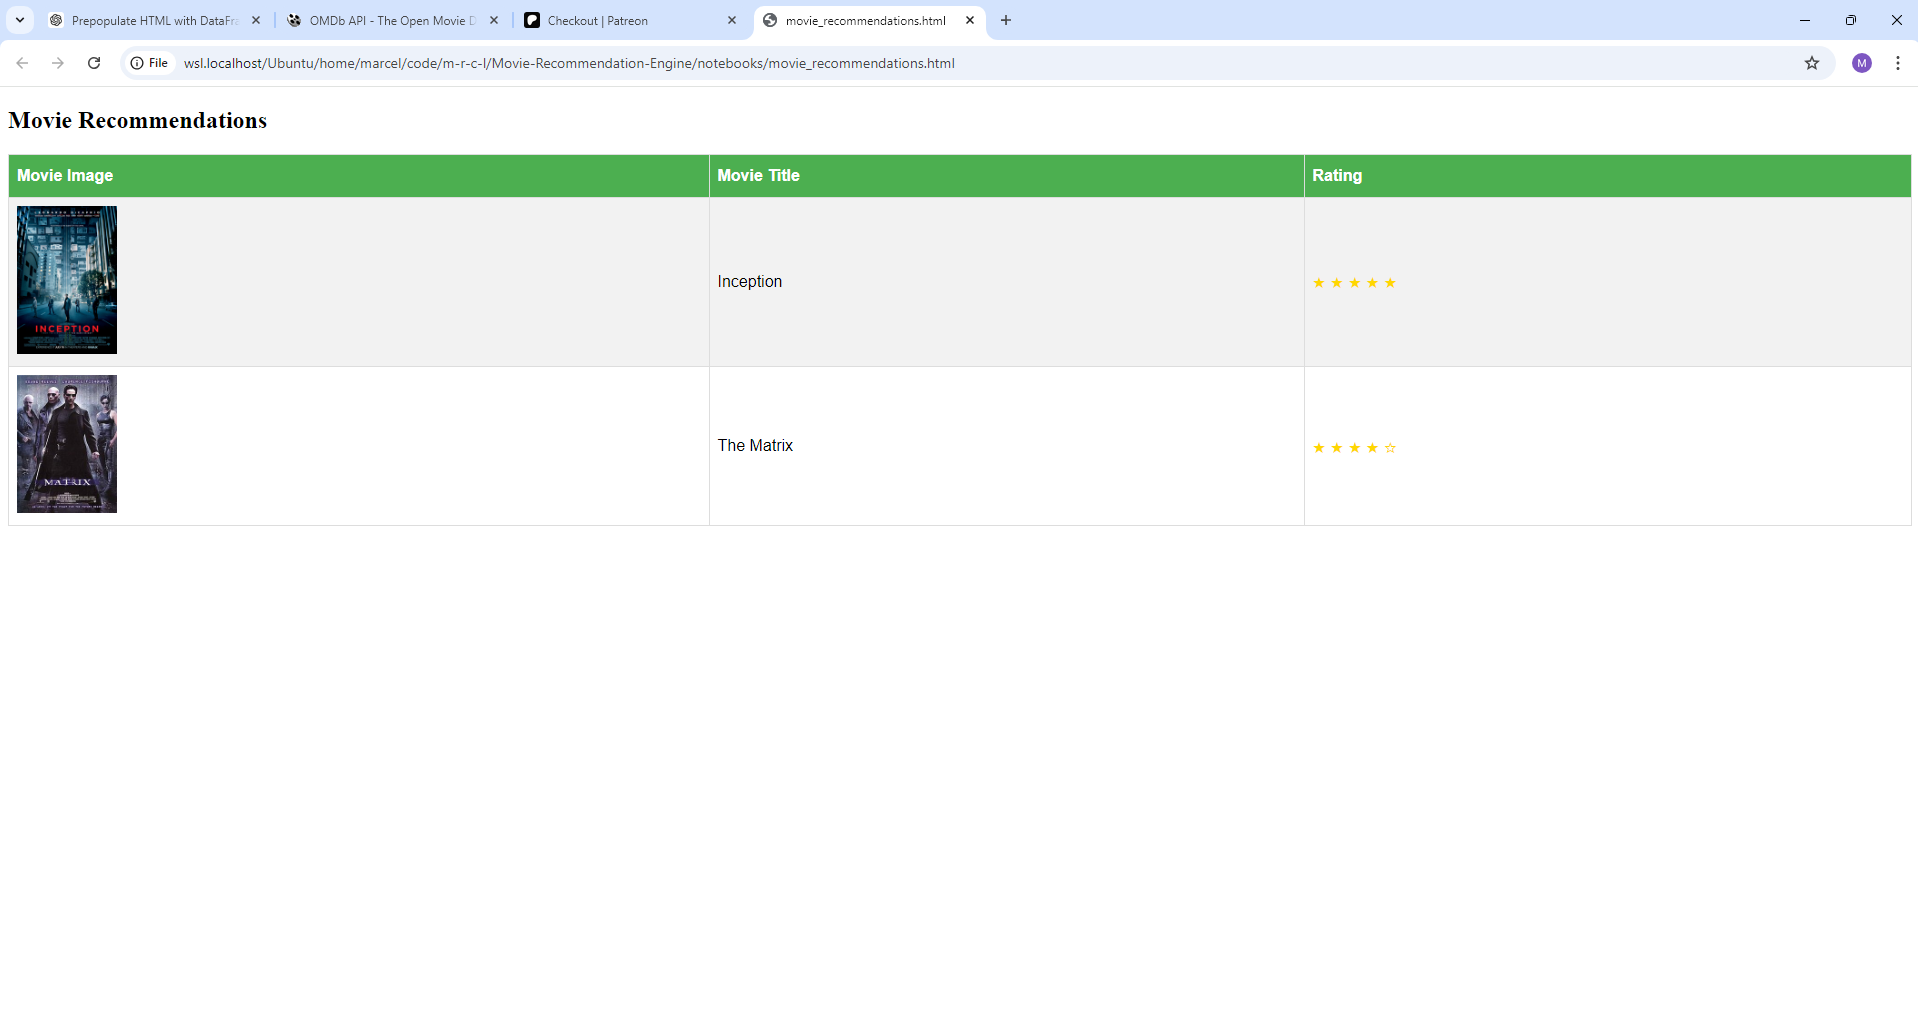

Idea: maybe we can fake adding the last movie per hand?

ChatGPT Prompt:
    
"Is it possible to prepopulate a html file with data from a dataframe?

The structure I've in mind is as follows:

The dataframe has two columns: movie title and movie rating.

In the HTML, I want a table that has an image of the movie (pulled from IMDB), the name of the movie and the rating as star icons. Name and rating should be pulled from the df."

# Create a input form where users can add (validated) movies, rank them and the image gets pulled after movie is being added.

In [16]:
# Sample dataframe
data = {'movie_title': ['Inception', 'The Matrix'], 'movie_rating': [5, 4], 'imdb_id': ['tt1375666','tt0133093']}
df = pd.DataFrame(data)

# Function to get movie image from IMDb (or another movie API)
def get_movie_image(title):
    # Placeholder URL - replace with actual API call to IMDb or another service
    # Example: https://www.omdbapi.com/?t={title}&apikey=YOUR_API_KEY
    return f"https://via.placeholder.com/150?text={title.replace(' ', '+')}"

# Apply image fetching to the dataframe
df['movie_image'] = ['https://upload.wikimedia.org/wikipedia/en/2/2e/Inception_%282010%29_theatrical_poster.jpg', 'https://upload.wikimedia.org/wikipedia/en/thumb/c/c1/The_Matrix_Poster.jpg/220px-The_Matrix_Poster.jpg']

# HTML template for the table
html_template = """
<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <title>Movie Rating Form</title>
    <style>
        body {
            font-family: Arial, sans-serif;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            margin-bottom: 20px;
        }
        th, td {
            border: 1px solid #ddd;
            padding: 8px;
            text-align: center;
        }
        th {
            background-color: #4CAF50;
            color: white;
        }
        .star {
            color: gold;
            cursor: pointer;
        }
        .hidden {
            display: none;
        }
        .input-field {
            width: 50%;
            padding: 10px;
            margin: 10px 0;
            box-sizing: border-box;
        }
    </style>
</head>
<body>

<h2>Movie Rating Form</h2>

<!-- Movie title input -->
<label for="movie-title">Movie Title:</label>
<input type="text" id="movie-title" class="input-field" placeholder="Enter movie title" list="movie-titles" autocomplete="off">
<datalist id="movie-titles">
    <!-- Options to be filled dynamically by the dataframe -->
</datalist>

<!-- Poster display -->
<div id="movie-poster" class="hidden">
    <img id="poster-img" src="" alt="Movie Poster" style="width:150px;">
</div>

<!-- Star rating -->
<div id="rating" class="hidden">
    <span class="star" data-value="1">&#9733;</span>
    <span class="star" data-value="2">&#9733;</span>
    <span class="star" data-value="3">&#9733;</span>
    <span class="star" data-value="4">&#9733;</span>
    <span class="star" data-value="5">&#9733;</span>
</div>

<!-- Button to add another row -->
<button id="add-row" class="hidden">Add Another Movie</button>

<!-- Table to display the input movies -->
<table id="movie-table">
    <tr>
        <th>Movie Poster</th>
        <th>Movie Title</th>
        <th>Rating</th>
    </tr>
</table>

<script>
    // Sample movie data from dataframe (this will be dynamically filled)
    const movieData = {
        'Inception': 'https://via.placeholder.com/150?text=Inception',
        'The Matrix': 'https://via.placeholder.com/150?text=The+Matrix',
        // Add more movies from the dataframe here...
    };

    // Populate datalist with movie titles from dataframe
    const datalist = document.getElementById('movie-titles');
    Object.keys(movieData).forEach(movie => {
        const option = document.createElement('option');
        option.value = movie;
        datalist.appendChild(option);
    });

    const movieInput = document.getElementById('movie-title');
    const posterDiv = document.getElementById('movie-poster');
    const posterImg = document.getElementById('poster-img');
    const ratingDiv = document.getElementById('rating');
    const addRowBtn = document.getElementById('add-row');
    let selectedRating = 0;

    // Event listener for movie title input
    movieInput.addEventListener('input', function() {
        const movieTitle = this.value;
        if (movieData[movieTitle]) {
            posterImg.src = movieData[movieTitle];
            posterDiv.classList.remove('hidden');
            ratingDiv.classList.remove('hidden');
        } else {
            posterDiv.classList.add('hidden');
            ratingDiv.classList.add('hidden');
        }
    });

    // Event listener for star rating selection
    document.querySelectorAll('.star').forEach(star => {
        star.addEventListener('click', function() {
            selectedRating = this.getAttribute('data-value');
            document.querySelectorAll('.star').forEach(star => {
                star.style.color = star.getAttribute('data-value') <= selectedRating ? 'gold' : 'gray';
            });
            addRowBtn.classList.remove('hidden');
        });
    });

    // Event listener for "Add Another Movie" button
    addRowBtn.addEventListener('click', function() {
        const movieTitle = movieInput.value;
        if (!movieData[movieTitle]) return;

        // Create new row in the table
        const table = document.getElementById('movie-table');
        const newRow = table.insertRow();
        const posterCell = newRow.insertCell(0);
        const titleCell = newRow.insertCell(1);
        const ratingCell = newRow.insertCell(2);

        posterCell.innerHTML = `<img src="${movieData[movieTitle]}" style="width:100px;">`;
        titleCell.textContent = movieTitle;
        ratingCell.textContent = '★'.repeat(selectedRating) + '☆'.repeat(5 - selectedRating);

        // Clear input fields for the next entry
        movieInput.value = '';
        posterDiv.classList.add('hidden');
        ratingDiv.classList.add('hidden');
        addRowBtn.classList.add('hidden');
        selectedRating = 0;
        document.querySelectorAll('.star').forEach(star => {
            star.style.color = 'gray';
        });
    });
</script>

</body>
</html>
"""

# Compile the template with Jinja2
template = Template(html_template)

# Render the template with the dataframe data
rendered_html = template.render(rows=df.to_dict(orient='records'))

# Save the rendered HTML to a file
with open('movie_recommendations_2.html', 'w') as f:
    f.write(rendered_html)

print("HTML file generated: movie_recommendations_2.html")


HTML file generated: movie_recommendations_2.html


Example:

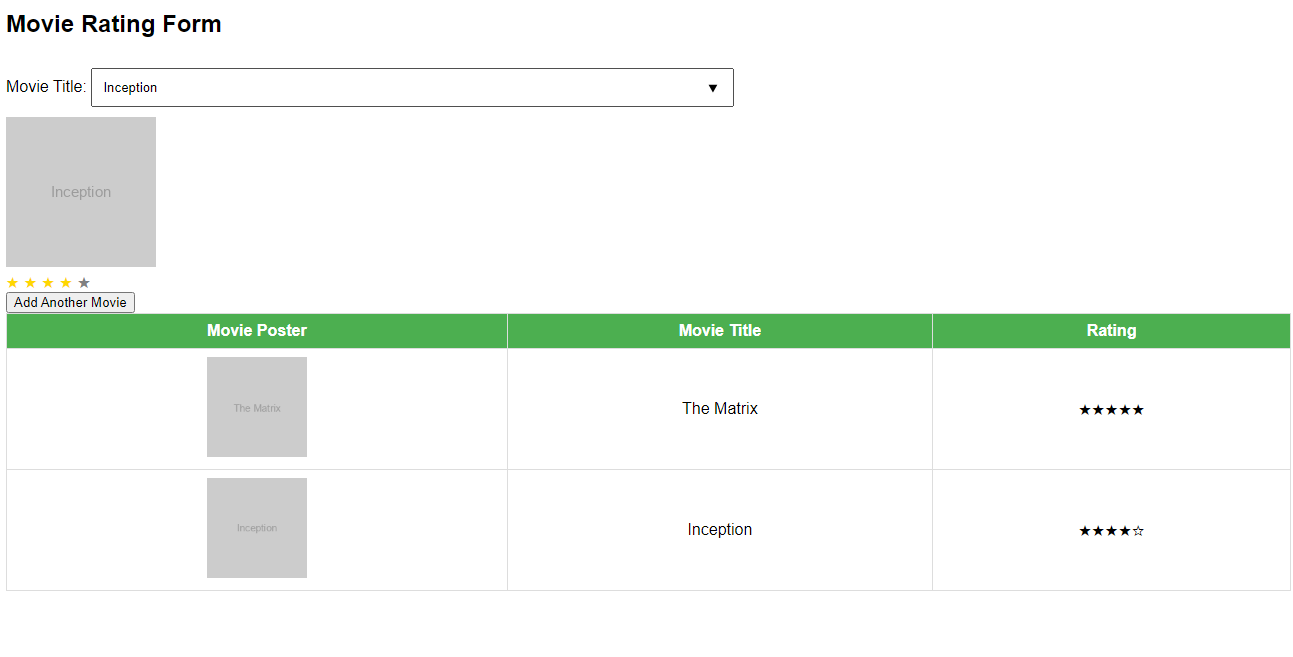

CHATGPT Prompt: 

"That's awesome! 

Can you now adjust the html file for me?

I'd like to have no entries in the table. Instead, there should be a field for "Movie Title" where I can enter a Movie Title and get suggestions based on the existing movies in the dataframe. It should only accept movies that are in the dataframe as input. Then, it should load the poser of the movie. And last, the user needs to rank the movie on the scale. When a user filled a row, there should be the option to add another row.

Is this clear or do you need more input?

## Modified such that it automatically updates valid movies based on df loaded

In [22]:
import pandas as pd
import requests
from jinja2 import Template

# Sample dataframe with movie titles and poster URLs
data = {
    'movie_title': ['Inception', 'The Matrix', 'Interstellar', 'Lord of the Rings'],
    'movie_poster': [
        'https://via.placeholder.com/150?text=Inception',
        'https://via.placeholder.com/150?text=The+Matrix',
        'https://via.placeholder.com/150?text=Interstellar',
        'https://via.placeholder.com/150?text=Lord+of+the+Rings'
    ]
}
df = pd.DataFrame(data)

# HTML template with placeholder for movie data
html_template = """
<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <title>Movie Rating Form</title>
    <style>
        body {
            font-family: Arial, sans-serif;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            margin-bottom: 20px;
        }
        th, td {
            border: 1px solid #ddd;
            padding: 8px;
            text-align: center;
        }
        th {
            background-color: #4CAF50;
            color: white;
        }
        .star {
            color: gold;
            cursor: pointer;
        }
        .hidden {
            display: none;
        }
        .input-field {
            width: 50%;
            padding: 10px;
            margin: 10px 0;
            box-sizing: border-box;
        }
    </style>
</head>
<body>

<h2>Movie Rating Form</h2>

<!-- Movie title input -->
<label for="movie-title">Movie Title:</label>
<input type="text" id="movie-title" class="input-field" placeholder="Enter movie title" list="movie-titles" autocomplete="off">
<datalist id="movie-titles">
    <!-- Options will be filled dynamically -->
</datalist>

<!-- Poster display -->
<div id="movie-poster" class="hidden">
    <img id="poster-img" src="" alt="Movie Poster" style="width:150px;">
</div>

<!-- Star rating -->
<div id="rating" class="hidden">
    <span class="star" data-value="1">&#9733;</span>
    <span class="star" data-value="2">&#9733;</span>
    <span class="star" data-value="3">&#9733;</span>
    <span class="star" data-value="4">&#9733;</span>
    <span class="star" data-value="5">&#9733;</span>
</div>

<!-- Button to add another row -->
<button id="add-row" class="hidden">Add Another Movie</button>

<!-- Table to display the input movies -->
<table id="movie-table">
    <tr>
        <th>Movie Poster</th>
        <th>Movie Title</th>
        <th>Rating</th>
    </tr>
</table>

<script>
    // Movie data (populated from Python dataframe)
    const movieData = {{ movie_data | safe }};

    // Populate datalist with movie titles from dataframe
    const datalist = document.getElementById('movie-titles');
    Object.keys(movieData).forEach(movie => {
        const option = document.createElement('option');
        option.value = movie;
        datalist.appendChild(option);
    });

    const movieInput = document.getElementById('movie-title');
    const posterDiv = document.getElementById('movie-poster');
    const posterImg = document.getElementById('poster-img');
    const ratingDiv = document.getElementById('rating');
    const addRowBtn = document.getElementById('add-row');
    let selectedRating = 0;

    // Event listener for movie title input
    movieInput.addEventListener('input', function() {
        const movieTitle = this.value;
        if (movieData[movieTitle]) {
            posterImg.src = movieData[movieTitle];
            posterDiv.classList.remove('hidden');
            ratingDiv.classList.remove('hidden');
        } else {
            posterDiv.classList.add('hidden');
            ratingDiv.classList.add('hidden');
        }
    });

    // Event listener for star rating selection
    document.querySelectorAll('.star').forEach(star => {
        star.addEventListener('click', function() {
            selectedRating = this.getAttribute('data-value');
            document.querySelectorAll('.star').forEach(star => {
                star.style.color = star.getAttribute('data-value') <= selectedRating ? 'gold' : 'gray';
            });
            addRowBtn.classList.remove('hidden');
        });
    });

    // Event listener for "Add Another Movie" button
    addRowBtn.addEventListener('click', function() {
        const movieTitle = movieInput.value;
        if (!movieData[movieTitle]) return;

        // Create new row in the table
        const table = document.getElementById('movie-table');
        const newRow = table.insertRow();
        const posterCell = newRow.insertCell(0);
        const titleCell = newRow.insertCell(1);
        const ratingCell = newRow.insertCell(2);

        posterCell.innerHTML = `<img src="${movieData[movieTitle]}" style="width:100px;">`;
        titleCell.textContent = movieTitle;
        ratingCell.textContent = '★'.repeat(selectedRating) + '☆'.repeat(5 - selectedRating);

        // Clear input fields for the next entry
        movieInput.value = '';
        posterDiv.classList.add('hidden');
        ratingDiv.classList.add('hidden');
        addRowBtn.classList.add('hidden');
        selectedRating = 0;
        document.querySelectorAll('.star').forEach(star => {
            star.style.color = 'gray';
        });
    });
</script>

</body>
</html>
"""

# Convert the dataframe into a dictionary for JavaScript
movie_data = df.set_index('movie_title')['movie_poster'].to_dict()

# Compile the template with Jinja2
template = Template(html_template)

# Render the template with the dataframe data
rendered_html = template.render(movie_data=movie_data)

# Save the rendered HTML to a file
with open('movie_recommendations_dynamic.html', 'w') as f:
    f.write(rendered_html)

print("HTML file generated: movie_recommendations_dynamic.html")


HTML file generated: movie_recommendations_dynamic.html


ChatGPT Prompt:

"When I add another movie to the dataframe, it's not appearing in the HTML 

It looks like this is because it's not in const movieData where it says "// Add more movies from the dataframe here..."

Is it possible that movieData is automatically updated from the df so I don't have to add new records manually?"